# Business Undertsanding 

A new business owner wants to open a restuarant in California. He has chosen three cities disctricts to explore.The business owners wants to see the surrounding venues for those cities and what type of restaurants are popular. We will examine the restaurant types and the likes for each type of restaurant. We will see which area for the type of restaurant and the amount of likes.  

Potential categories of restaurants to determine which one has the most likes: 
- European 
- Latin
- Asian 
- American
- Casual 


# Data

Using Foursquare and the raw data scraped from each url. We are only focusing on:

- Name
- Category 
- Latitude
- Longitude
- Id/City

Using another API we will get the __likes__ data and applying that to the machine learning models. 

Combined together we will have an overview of all the information from each city and see the type of restaurant has the most likes. 


# Methodology 


The owner wants to predict the 'likes' of a certain type of restaurant. The more likes it can predict the higher chance for success. 

__Libraries needed:__
- Pandas
- Numpy 
- Matplotib 
- Sci-kit learn

__Machine learning models__
- Logistic regression: great for predicting classification. In this case __yes__ like or __no__ like.

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 
import seaborn as sns
import json
import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 
import matplotlib.pyplot as plt
import pylab as pl
import itertools
import warnings
warnings.filterwarnings('ignore')

from urllib.request import urlopen
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim 
from sklearn import linear_model
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

print('All libraries have been imported')

All libraries have been imported


In [2]:
address1 = 'Oakland, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location1 = geolocator.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address1, latitude1, longitude1))

address2 = 'Emeryville, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location2 = geolocator.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address2, latitude2, longitude2))

address3 = 'San Diego, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location3 = geolocator.geocode(address3)
latitude3 = location3.latitude
longitude3 = location3.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address3, latitude3, longitude3))

The geograpical coordinate of Oakland, California are 37.8044557, -122.2713563.
The geograpical coordinate of Emeryville, California are 37.8314089, -122.2865266.
The geograpical coordinate of San Diego, California are 32.7174202, -117.1627728.


In [3]:
CLIENT_ID = 'FOOE0M5S5QMCVKKXYQZTD2Z55JHNOE0K0Y3SFUXUYTJTLV4Q' # your Foursquare ID
CLIENT_SECRET = '3LUKVDWWTVWBNUEQ5PVDPD5SQB1CBILNUE1HP3WVM44C013M' # your Foursquare Secret
VERSION = '20210804' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URLs
url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude1, 
    longitude1, 
    radius, 
    LIMIT)


# create URLs
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude2, 
    longitude2, 
    radius, 
    LIMIT)


# create URLs
url3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude3, 
    longitude3, 
    radius, 
    LIMIT)

print(url1, url2, url3)

Your credentails:
CLIENT_ID: FOOE0M5S5QMCVKKXYQZTD2Z55JHNOE0K0Y3SFUXUYTJTLV4Q
CLIENT_SECRET:3LUKVDWWTVWBNUEQ5PVDPD5SQB1CBILNUE1HP3WVM44C013M
https://api.foursquare.com/v2/venues/explore?&client_id=FOOE0M5S5QMCVKKXYQZTD2Z55JHNOE0K0Y3SFUXUYTJTLV4Q&client_secret=3LUKVDWWTVWBNUEQ5PVDPD5SQB1CBILNUE1HP3WVM44C013M&v=20210804&ll=37.8044557,-122.2713563&radius=1000&limit=100 https://api.foursquare.com/v2/venues/explore?&client_id=FOOE0M5S5QMCVKKXYQZTD2Z55JHNOE0K0Y3SFUXUYTJTLV4Q&client_secret=3LUKVDWWTVWBNUEQ5PVDPD5SQB1CBILNUE1HP3WVM44C013M&v=20210804&ll=37.8314089,-122.2865266&radius=1000&limit=100 https://api.foursquare.com/v2/venues/explore?&client_id=FOOE0M5S5QMCVKKXYQZTD2Z55JHNOE0K0Y3SFUXUYTJTLV4Q&client_secret=3LUKVDWWTVWBNUEQ5PVDPD5SQB1CBILNUE1HP3WVM44C013M&v=20210804&ll=32.7174202,-117.1627728&radius=1000&limit=100


In [4]:
# scrape the data from the generated URLs

results1 = requests.get(url1).json()
results1

results2 = requests.get(url2).json()
results2

results3 = requests.get(url3).json()
results3

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

# FIRST CITY   

venues1 = results1['response']['groups'][0]['items']
nearby_venues1 = pd.json_normalize(venues1) # flatten JSON

# filter columns
filtered_columns1 = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues1 = nearby_venues1.loc[:, filtered_columns1]

# filter the category for each row
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type, axis=1)

# clean columns
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues1.columns]

# SECOND CITY

venues2 = results2['response']['groups'][0]['items']
nearby_venues2 = pd.json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues2 = nearby_venues2.loc[:, filtered_columns2]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

# THIRD CITY

venues3 = results3['response']['groups'][0]['items']
nearby_venues3 = pd.json_normalize(venues3) # flatten JSON

# filter columns
filtered_columns3 = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues3 = nearby_venues3.loc[:, filtered_columns3]

# filter the category for each row
nearby_venues3['venue.categories'] = nearby_venues3.apply(get_category_type, axis=1)

# clean columns
nearby_venues3.columns = [col.split(".")[-1] for col in nearby_venues3.columns]





print('{} venues for Oakland, California were returned by Foursquare.'.format(nearby_venues1.shape[0]))
print()
print('{} venues for Emeryville, California were returned by Foursquare.'.format(nearby_venues2.shape[0]))
print()
print('{} venues for San Diego, California were returned by Foursquare.'.format(nearby_venues3.shape[0]))

100 venues for Oakland, California were returned by Foursquare.

100 venues for Emeryville, California were returned by Foursquare.

100 venues for San Diego, California were returned by Foursquare.


In [5]:
# add locations data to the data sets of each city

nearby_venues1['city'] = 'Oakland'
nearby_venues2['city'] = 'Emeryville'
nearby_venues3['city'] = 'San Diego'

In [6]:
nearby_venues1.categories.value_counts()

Coffee Shop                      7
Bar                              7
Chinese Restaurant               5
Café                             5
Vietnamese Restaurant            4
Sandwich Place                   4
Beer Garden                      3
Mexican Restaurant               3
Brewery                          2
Bakery                           2
Wine Bar                         2
Japanese Restaurant              2
Caribbean Restaurant             2
Vegetarian / Vegan Restaurant    2
Music Venue                      2
Bubble Tea Shop                  2
Brazilian Restaurant             2
Dim Sum Restaurant               2
Ice Cream Shop                   2
Tapas Restaurant                 1
Hotpot Restaurant                1
Cambodian Restaurant             1
American Restaurant              1
Ramen Restaurant                 1
Museum                           1
Dessert Shop                     1
Sausage Shop                     1
Sports Bar                       1
Kitchen Supply Store

** Oakland: 
__Top 3 venues__
- Bar
- Vietnamese restuarant 
- Chinese restuarant 

In [7]:
nearby_venues2.categories.value_counts()

Clothing Store                     7
Coffee Shop                        6
Pizza Place                        5
Cosmetics Shop                     5
Furniture / Home Store             4
Discount Store                     2
Mattress Store                     2
Kids Store                         2
Candy Store                        2
Movie Theater                      2
Diner                              2
Pet Store                          2
Park                               2
Mobile Phone Shop                  2
Bakery                             2
Sandwich Place                     2
Scandinavian Restaurant            2
Taco Place                         2
Bar                                2
Electronics Store                  2
Paper / Office Supplies Store      1
Stadium                            1
Vegetarian / Vegan Restaurant      1
Sports Bar                         1
Casino                             1
Burger Joint                       1
Gym                                1
D

**Emeryville: Top 3 ranking

- Clothing
- Coffee
- Cosmetic 

In [8]:
nearby_venues3.categories.value_counts()

Hotel                      12
Italian Restaurant          5
Mexican Restaurant          5
Bar                         4
Coffee Shop                 4
New American Restaurant     3
Sushi Restaurant            3
Sandwich Place              3
Café                        3
Gym                         2
Ice Cream Shop              2
Breakfast Spot              2
Seafood Restaurant          2
Theater                     2
Brewery                     2
Hookah Bar                  2
Lingerie Store              2
Music Venue                 2
American Restaurant         2
Mobile Phone Shop           1
Theme Restaurant            1
Business Service            1
Park                        1
Sports Bar                  1
Vietnamese Restaurant       1
Liquor Store                1
Farmers Market              1
Health Food Store           1
Indian Restaurant           1
Lounge                      1
Plaza                       1
Pedestrian Plaza            1
Cosmetics Shop              1
Gastropub 

**San Diego: Top 3 ranking 

- Hotel
- Italian Restuarant 
- Mexican 

In [9]:
# combine the three cities into one data set

nearby_venues = nearby_venues1.copy()
nearby_venues = nearby_venues.append(nearby_venues2)
nearby_venues = nearby_venues.append(nearby_venues3)

In [10]:
# Let's reset the indexing again so the index is in order per city. 
nearby_venues.reset_index(drop = True, inplace = True)

In [11]:
nearby_venues

,name,categories,lat,lng,id,city
0,Oaklandish,Clothing Store,37.805075,-122.270726,4dfb9c2c1f6eeef806ab898c,Oakland
1,Cafe Van Kleef,Bar,37.806660,-122.270273,46884818f964a52056481fe3,Oakland
2,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland
3,The Hatch,Bar,37.805006,-122.269584,5482a50d498e9b7b77f386ba,Oakland
4,Cape & Cowl,Comic Shop,37.806725,-122.272747,56562410498ea43ab630819a,Oakland
5,Woods Bar & Brewery,Brewery,37.806889,-122.270415,5419f32c498e561ee5c2fa38,Oakland
6,Bar Shiru,Bar,37.806378,-122.270393,5c5b9abdf870fd002c35d291,Oakland
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland
8,Lucky Duck Bicycle Cafe,Café,37.801684,-122.268656,57bf810c498ee0a34d9f8ca1,Oakland
9,Ume Yoga,Yoga Studio,37.805493,-122.270945,57348ac1498e7aae9899a535,Oakland


In [12]:
nearby_venues.city.value_counts()

Emeryville    100
Oakland       100
San Diego     100
Name: city, dtype: int64

In [13]:
nearby_venues.categories.value_counts()

Coffee Shop                        17
Bar                                13
Hotel                              13
Mexican Restaurant                  9
Sandwich Place                      9
Café                                8
Clothing Store                      8
Cosmetics Shop                      6
Pizza Place                         6
Vietnamese Restaurant               5
Italian Restaurant                  5
Chinese Restaurant                  5
Music Venue                         4
Brewery                             4
Furniture / Home Store              4
Bakery                              4
Ice Cream Shop                      4
New American Restaurant             4
Sushi Restaurant                    4
Breakfast Spot                      4
Taco Place                          4
Wine Bar                            3
Seafood Restaurant                  3
Park                                3
American Restaurant                 3
Vegetarian / Vegan Restaurant       3
Gym         

In [15]:
nearby_venues['categories'].unique()

array(['Clothing Store', 'Bar', 'Vegetarian / Vegan Restaurant',
       'Comic Shop', 'Brewery', 'Japanese Restaurant', 'Café',
       'Yoga Studio', 'Music Venue', 'Bagel Shop',
       'Vietnamese Restaurant', 'Coffee Shop', 'Tiki Bar', 'Wine Bar',
       'Mexican Restaurant', 'Seafood Restaurant', 'Dance Studio',
       'Skating Rink', 'Chinese Restaurant', 'Caribbean Restaurant',
       'Kitchen Supply Store', 'Brazilian Restaurant', 'Beer Bar',
       'Nightclub', 'Cocktail Bar', 'Sushi Restaurant', 'Food Court',
       'Sausage Shop', 'Taco Place', 'Ice Cream Shop', 'Dessert Shop',
       'Cupcake Shop', 'Bubble Tea Shop', 'Tapas Restaurant',
       'Cambodian Restaurant', 'Bakery', 'Burger Joint', 'Climbing Gym',
       'Juice Bar', 'Sandwich Place', 'Farmers Market',
       'American Restaurant', 'Tea Room', 'Lounge', 'Hotpot Restaurant',
       'New American Restaurant', 'Arts & Crafts Store',
       'Thai Restaurant', 'Beer Garden', 'Gay Bar', 'Indian Restaurant',
       'Dump

## Let us focus on restuarants 

In [16]:
# check list and manually remove all non-restaurant data

nearby_venues['categories'].unique()

removal_list = ['Clothing Store','Bar','Brewery', 
                'Comic Shop', 'Yoga Studio','Café', 
                'Coffee Shop', 'Tiki Bar', 'Music Venue', 
                'Wine Bar',  'Cocktail Bar', 'Dance Studio', 
                'Gym / Fitness Center','Beer Bar', 
                'Bubble Tea Shop', 'Nightclub', 'Food Court', 
                'Ice Cream Shop', 'Cupcake Shop', 'Skating Rink', 
                'Dessert Shop', 'Climbing Gym', 'Bakery', 
                'Farmers Market', 'Gay Bar','Beer Garden',
                'Tea Room','Arts & Crafts Store', 'Grocery Store', 
                'Sports Bar', 'Museum', 'Street Food Gathering', 
                'Library', 'Skate Park', 'Movie Theater','Park', 
                'Gym', 'Stadium', 'Furniture / Home Store', 'Discount Store', 
                'Playground', 'Cosmetics Shop', 'Casino', 
                'Pet Store','Electronics Store', 'Snack Place',
                'Salon / Barbershop', 'Shopping Plaza', 'Deli / Bodega', 
                'Candy Store', 'Liquor Store', 'Hotel', 
                'Shoe Store', 'Bookstore', 'Shopping Mall', 
                'Dive Bar', 'Video Game Store', 'Pharmacy', 
                'Accessories Store', 'Lingerie Store', 'Mobile Phone Shop', 
                'Pool Hall', 'Juice Bar', 'Kids Store', 
                'Supplement Shop', 'Big Box Store', 'Mattress Store', 
                'Hardware Store', 'Paper / Office Supplies Store', 'Theater', 
                'Business Service', 'Donut Shop', 'Beer Store', 
                'Lounge', 'Health Food Store', 'Pedestrian Plaza', 
                'Hookah Bar', 'Concert Hall', 'Chocolate Shop', 
                'Hostel', 'Convenience Store', 'Pub', 
                'Plaza', 'Comedy Club', 'Speakeasy', 
                'Tattoo Parlor', 'Massage Studio']

nearby_venues = nearby_venues[~nearby_venues['categories'].isin(removal_list)]

nearby_venues['categories'].unique().tolist()

['Vegetarian / Vegan Restaurant',
 'Japanese Restaurant',
 'Bagel Shop',
 'Vietnamese Restaurant',
 'Mexican Restaurant',
 'Seafood Restaurant',
 'Chinese Restaurant',
 'Caribbean Restaurant',
 'Kitchen Supply Store',
 'Brazilian Restaurant',
 'Sushi Restaurant',
 'Sausage Shop',
 'Taco Place',
 'Tapas Restaurant',
 'Cambodian Restaurant',
 'Burger Joint',
 'Sandwich Place',
 'American Restaurant',
 'Hotpot Restaurant',
 'New American Restaurant',
 'Thai Restaurant',
 'Indian Restaurant',
 'Dumpling Restaurant',
 'Dim Sum Restaurant',
 'Breakfast Spot',
 'Falafel Restaurant',
 'Ramen Restaurant',
 'Diner',
 'Pizza Place',
 'Mediterranean Restaurant',
 'Scandinavian Restaurant',
 'Southern / Soul Food Restaurant',
 'Filipino Restaurant',
 'Asian Restaurant',
 'Food Truck',
 'Wings Joint',
 'Burrito Place',
 'Fast Food Restaurant',
 "Men's Store",
 'Italian Restaurant',
 'Theme Restaurant',
 'Hot Dog Joint',
 'Turkish Restaurant',
 'Gastropub',
 'Empanada Restaurant']

## We will gather data about each type of restuarant based on its number of likes 

In [17]:
# set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in list(nearby_venues.id):
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)


nearby_venues['likes'] = like_list
nearby_venues.head()

[77, 154, 22, 72, 33, 199, 63, 367, 100, 115, 39, 51, 6, 176, 182, 43, 40, 171, 46, 24, 39, 91, 52, 76, 11, 237, 50, 33, 261, 25, 13, 15, 38, 36, 45, 5, 97, 66, 42, 226, 52, 9, 75, 111, 329, 127, 132, 36, 24, 13, 31, 7, 55, 60, 92, 16, 18, 22, 63, 17, 4, 65, 5, 1, 41, 17, 1, 0, 3, 31, 156, 76, 3, 79, 171, 33, 26, 131, 41, 35, 15, 142, 105, 24, 34, 18, 94, 35, 31, 297, 21, 31, 222, 129, 97, 185, 104, 19, 264, 323, 480, 30, 546, 31, 132, 490, 8]


,name,categories,lat,lng,id,city,likes
2,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland,77
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland,154
11,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland,22
12,Tay Ho Restaurant & Bar,Vietnamese Restaurant,37.802062,-122.269573,4c8b16ec52a98cfad73533e9,Oakland,72
14,Nature Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.802157,-122.270983,4f52deb2e4b0ac6d0c91df05,Oakland,33
17,Cosecha,Mexican Restaurant,37.801607,-122.274889,4e179c7752b123a586cef176,Oakland,199
18,The Cook And Her Farmer,Seafood Restaurant,37.801583,-122.274860,5376a879498e8eeb2402cd71,Oakland,63
24,Shan Dong,Chinese Restaurant,37.800500,-122.270046,4a22d464f964a520927d1fe3,Oakland,367
25,Miss Ollie's,Caribbean Restaurant,37.801448,-122.274680,50be580af136a1fe01a5db73,Oakland,100
27,Umami Mart,Kitchen Supply Store,37.800483,-122.273744,501c7838e4b08947b4df755e,Oakland,115


array(['Vegetarian / Vegan Restaurant', 'Japanese Restaurant',
       'Bagel Shop', 'Vietnamese Restaurant', 'Mexican Restaurant',
       'Seafood Restaurant', 'Chinese Restaurant', 'Caribbean Restaurant',
       'Kitchen Supply Store', 'Brazilian Restaurant', 'Sushi Restaurant',
       'Sausage Shop', 'Taco Place', 'Tapas Restaurant',
       'Cambodian Restaurant', 'Burger Joint', 'Sandwich Place',
       'American Restaurant', 'Hotpot Restaurant',
       'New American Restaurant', 'Thai Restaurant', 'Indian Restaurant',
       'Dumpling Restaurant', 'Dim Sum Restaurant', 'Breakfast Spot',
       'Falafel Restaurant', 'Ramen Restaurant', 'Diner', 'Pizza Place',
       'Mediterranean Restaurant', 'Scandinavian Restaurant',
       'Southern / Soul Food Restaurant', 'Filipino Restaurant',
       'Asian Restaurant', 'Food Truck', 'Wings Joint', 'Burrito Place',
       'Fast Food Restaurant', "Men's Store", 'Italian Restaurant',
       'Theme Restaurant', 'Hot Dog Joint', 'Turkish Restaura

In [ ]:
nearby_venues.count()

# Focus on only the different types of restaurants that the owner wants to determine. 

- European
- Latin
- Asian
- American 
- Causal

In [27]:
raw_dataset = nearby_venues
raw_dataset.head()

,name,categories,lat,lng,id,city,likes
2,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland,77
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland,154
11,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland,22
12,Tay Ho Restaurant & Bar,Vietnamese Restaurant,37.802062,-122.269573,4c8b16ec52a98cfad73533e9,Oakland,72
14,Nature Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.802157,-122.270983,4f52deb2e4b0ac6d0c91df05,Oakland,33


In [28]:
# Find unique restuarants

raw_dataset['categories'].unique().tolist()

['Vegetarian / Vegan Restaurant',
 'Japanese Restaurant',
 'Bagel Shop',
 'Vietnamese Restaurant',
 'Mexican Restaurant',
 'Seafood Restaurant',
 'Chinese Restaurant',
 'Caribbean Restaurant',
 'Kitchen Supply Store',
 'Brazilian Restaurant',
 'Sushi Restaurant',
 'Sausage Shop',
 'Taco Place',
 'Tapas Restaurant',
 'Cambodian Restaurant',
 'Burger Joint',
 'Sandwich Place',
 'American Restaurant',
 'Hotpot Restaurant',
 'New American Restaurant',
 'Thai Restaurant',
 'Indian Restaurant',
 'Dumpling Restaurant',
 'Dim Sum Restaurant',
 'Breakfast Spot',
 'Falafel Restaurant',
 'Ramen Restaurant',
 'Diner',
 'Pizza Place',
 'Mediterranean Restaurant',
 'Scandinavian Restaurant',
 'Southern / Soul Food Restaurant',
 'Filipino Restaurant',
 'Asian Restaurant',
 'Food Truck',
 'Wings Joint',
 'Burrito Place',
 'Fast Food Restaurant',
 "Men's Store",
 'Italian Restaurant',
 'Theme Restaurant',
 'Hot Dog Joint',
 'Turkish Restaurant',
 'Gastropub',
 'Empanada Restaurant']

In [29]:
# we can group some cuisines together to make a better categorical variable

european = ['Mediterranean Restaurant', 'Scandinavian Restaurant', 'Pizza Place',
       'French Restaurant', 'Falafel Restaurant', 'Italian Restaurant',
       'Turkish Restaurant']

latin = ['Mexican Restaurant', 'Taco Place', 'Brazilian Restaurant', 
          'Burrito Place']

asian = ['Japanese Restaurant', 'Vietnamese Restaurant', 'Chinese Restaurant',
         'Hot Dog Joint', 'Hotpot Restaurant', 'Indian Restaurant',
         'Thai Restaurant', 'Dumpling Restaurant', 'Dim Sum Restaurant',
         'Asian Restaurant', 'Filipino Restaurant', 'Sushi Restaurant',
         'Ramen Restaurant']

american = ['Vegetarian / Vegan Restaurant', 'Seafood Restaurant', 'Caribbean Restaurant',
           'Burger Joint', 'American Restaurant', 'New American Restaurant',
            'Southern / Soul Food Restaurant', 'Diner']

casual = ['Bagel Shop', 'Sandwich Place', 'Fried Chicken Joint', 
          'Breakfast Spot', 'Wings Joint', 'Fast Food Restaurant',
          'Theme Restaurant']

def conditions(s):
    if s['categories'] in european:
        return 'european'
    if s['categories'] in latin:
        return 'latin'
    if s['categories'] in asian:
        return 'asian'
    if s['categories'] in american:
        return 'american'
    if s['categories'] in casual:
        return 'casual'

raw_dataset['categories_classified'] = raw_dataset.apply(conditions, axis=1)
raw_dataset

,name,categories,lat,lng,id,city,likes,categories_classified
2,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland,77,american
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland,154,asian
11,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland,22,casual
12,Tay Ho Restaurant & Bar,Vietnamese Restaurant,37.802062,-122.269573,4c8b16ec52a98cfad73533e9,Oakland,72,asian
14,Nature Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.802157,-122.270983,4f52deb2e4b0ac6d0c91df05,Oakland,33,american
17,Cosecha,Mexican Restaurant,37.801607,-122.274889,4e179c7752b123a586cef176,Oakland,199,latin
18,The Cook And Her Farmer,Seafood Restaurant,37.801583,-122.274860,5376a879498e8eeb2402cd71,Oakland,63,american
24,Shan Dong,Chinese Restaurant,37.800500,-122.270046,4a22d464f964a520927d1fe3,Oakland,367,asian
25,Miss Ollie's,Caribbean Restaurant,37.801448,-122.274680,50be580af136a1fe01a5db73,Oakland,100,american
27,Umami Mart,Kitchen Supply Store,37.800483,-122.273744,501c7838e4b08947b4df755e,Oakland,115,None


## What restaurant category has the highest amount? 

col_0                  count
categories_classified       
american                  21
asian                     27
casual                    17
european                  17
latin                     17


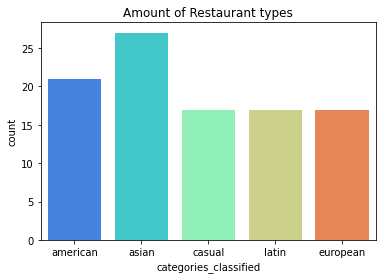

In [116]:
print(pd.crosstab(index = raw_dataset["categories_classified"],
            columns="count"))
sns.countplot(raw_dataset.categories_classified,palette="rainbow")
plt.title('Amount of Restaurant types')
plt.show();


## Category per city disctrict  

col_0       count
city             
Emeryville     26
Oakland        44
San Diego      37


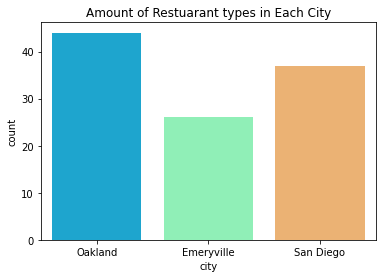

In [117]:
print(pd.crosstab(index = raw_dataset["city"],
            columns="count"))
sns.countplot(raw_dataset.city,palette="rainbow")
plt.title('Amount of Restuarant types in Each City')
plt.show();

## Combine City District and Category of Restuarant 

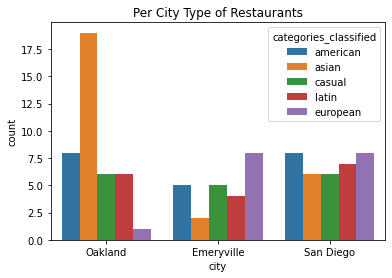

In [118]:
sns.countplot(x = 'city', hue = 'categories_classified', data = raw_dataset)
plt.title('Per City Type of Restaurants');

__Conclusion From Data__

If we wanted to open a restaurant in Oakland: 

- Asian has the highest amount by double or triple the amount than other types.

If owner wanted to open in Emeryville: 

- European has the highest amount. 

If owner wanted to opem in San Diego:

- American, European are the top two types. 

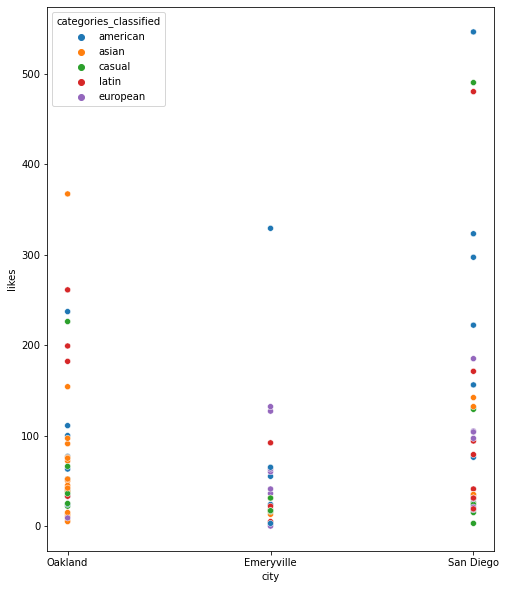

In [97]:
fig_dims = (8, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=raw_dataset, x="city", y="likes", hue="categories_classified");

 ## Analyze each type of restaurant by likes per city district 
 
Even though one type of restaurant has more location, it does not mean it has the most likes. Let's investigate which type of restaurant in each city has the most amount of likes. 

# Oakland Disctrict 

In [74]:
df_oakland = raw_dataset[raw_dataset['city']== 'Oakland']

In [75]:
df_oakland.head()

,name,categories,lat,lng,id,city,likes,categories_classified
2,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland,77,american
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland,154,asian
11,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland,22,casual
12,Tay Ho Restaurant & Bar,Vietnamese Restaurant,37.802062,-122.269573,4c8b16ec52a98cfad73533e9,Oakland,72,asian
14,Nature Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.802157,-122.270983,4f52deb2e4b0ac6d0c91df05,Oakland,33,american


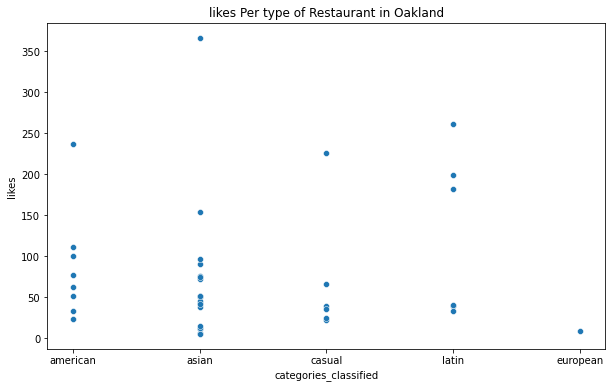

In [122]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'categories_classified', y = 'likes', data = df_oakland)
plt.title('likes Per type of Restaurant in Oakland');

__Conclusion From Data__

In Oakland, Asian food has the highest likes with over 350. European food ranks at the bottom with under 50 likes. 

----

# Emeryville Disctrict 

In [99]:
df_emeryville = raw_dataset[raw_dataset['city']== 'Emeryville']
df_emeryville.head()

,name,categories,lat,lng,id,city,likes,categories_classified
103,Rudy's Can't Fail Cafe,Diner,37.830967,-122.285919,4ada8cf0f964a520702321e3,Emeryville,329,american
105,Arizmendi Bakery & Pizzeria,Pizza Place,37.833035,-122.280716,4a6ce0bcf964a520e8d11fe3,Emeryville,127,european
107,Wally's Cafe,Mediterranean Restaurant,37.830066,-122.279391,4a7e4c1df964a520b7f11fe3,Emeryville,132,european
112,IKEA Swedish Food Market,Scandinavian Restaurant,37.831466,-122.292353,4fc5517ee4b013c9bb895fe4,Emeryville,36,european
119,Touch Of Soul,Southern / Soul Food Restaurant,37.834334,-122.280718,4ed1b2984690a03b5eff2a54,Emeryville,24,american


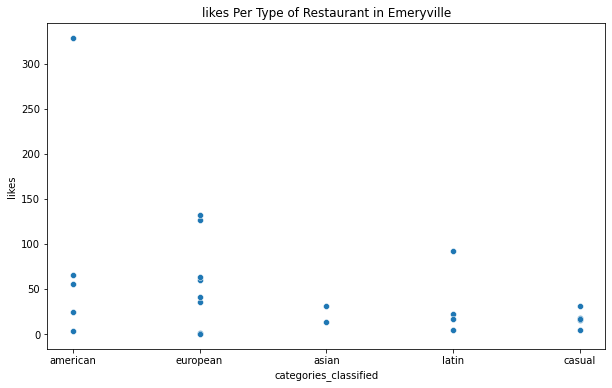

In [121]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'categories_classified', y = 'likes', data = df_emeryville)
plt.title('likes Per Type of Restaurant in Emeryville');

__Conclusion From Data__

in Emeryville, american style restaurant has the highest likes with over 300. Casual has the lowest of around 50. 

# San Diego District

In [101]:
df_sd = raw_dataset[raw_dataset['city']== 'San Diego']
df_sd.head()

,name,categories,lat,lng,id,city,likes,categories_classified
201,Tender Greens,New American Restaurant,32.716082,-117.163925,51d0c254498e603aabbc5bae,San Diego,156,american
202,Grant Grill,American Restaurant,32.716125,-117.161084,40e0b100f964a52030021fe3,San Diego,76,american
207,Mendocino Farms,Sandwich Place,32.716250,-117.163360,5e3df1e09847040008d9797a,San Diego,3,casual
211,The Taco Stand Downtown,Taco Place,32.717749,-117.158497,568daf60498eaf94b8afbc5d,San Diego,79,latin
214,Rei Do Gado,Brazilian Restaurant,32.715202,-117.160940,4b933ab9f964a5204d3c34e3,San Diego,171,latin


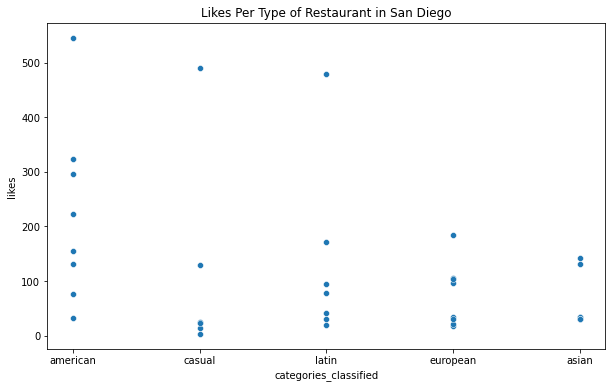

In [123]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'categories_classified', y = 'likes', data = df_sd)
plt.title('Likes Per Type of Restaurant in San Diego');

__Conclusion from Data__

In San Diego, American with 500+ likes, casual 500+ likes and latino 490+ likes types are the highest. Asian ranks the lowest with 150+ likes. 

----

# Let's build a model to predict which type of restaurant would be the most successful in the given area.

- We can compare this model to our first initial analysis to see if we chose the right model to predict the outcome. 

__We determined that:__

- Oakland = Asian type restaurant with 350+ likes. 
- Emeryville = Americn type restaurant with 350+ likes.
- San Diego = American types restaurant with 500+ likes.



In [106]:
# Create levels of ranking to determine the rank of the restaurant 

def rankings(df):
    
    if df['likes'] <= 60:
        return 3
    
    elif df['likes'] <= 100:
        return 2
    
    elif df['likes'] > 100:
        return 1

In [107]:
# apply rankings function to dataset

raw_dataset['ranking'] = raw_dataset.apply(rankings, axis=1)
raw_dataset

,name,categories,lat,lng,id,city,likes,categories_classified,ranking
2,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland,77,american,2
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland,154,asian,1
11,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland,22,casual,3
12,Tay Ho Restaurant & Bar,Vietnamese Restaurant,37.802062,-122.269573,4c8b16ec52a98cfad73533e9,Oakland,72,asian,2
14,Nature Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.802157,-122.270983,4f52deb2e4b0ac6d0c91df05,Oakland,33,american,3
17,Cosecha,Mexican Restaurant,37.801607,-122.274889,4e179c7752b123a586cef176,Oakland,199,latin,1
18,The Cook And Her Farmer,Seafood Restaurant,37.801583,-122.274860,5376a879498e8eeb2402cd71,Oakland,63,american,2
24,Shan Dong,Chinese Restaurant,37.800500,-122.270046,4a22d464f964a520927d1fe3,Oakland,367,asian,1
25,Miss Ollie's,Caribbean Restaurant,37.801448,-122.274680,50be580af136a1fe01a5db73,Oakland,100,american,2
27,Umami Mart,Kitchen Supply Store,37.800483,-122.273744,501c7838e4b08947b4df755e,Oakland,115,None,1


In [108]:
# create dummies for linear regression modelling

# one hot encoding
reg_dataset = pd.get_dummies(raw_dataset[['categories_classified', 
                                          'city',]], 
                               prefix="", 
                               prefix_sep="")

# add name, ranking, and likes columns back to dataframe
reg_dataset['ranking'] = raw_dataset['ranking']
reg_dataset['likes'] = raw_dataset['likes']
reg_dataset['name'] = raw_dataset['name']

# move name column to the first column
reg_columns = [reg_dataset.columns[-1]] + list(reg_dataset.columns[:-1])
reg_dataset = reg_dataset[reg_columns]


reg_dataset.head()

,name,american,asian,casual,european,latin,Emeryville,Oakland,San Diego,ranking,likes
2,Golden Lotus Vegetarian Restaurant,1,0,0,0,0,0,1,0,2,77
7,Abura-Ya,0,1,0,0,0,0,1,0,1,154
11,Beauty’s Bagel Shop,0,0,1,0,0,0,1,0,3,22
12,Tay Ho Restaurant & Bar,0,1,0,0,0,0,1,0,2,72
14,Nature Vegetarian Restaurant,1,0,0,0,0,0,1,0,3,33


In [109]:
# Multiple Linear Regression

msk = np.random.rand(len(reg_dataset)) < 0.8
train = reg_dataset[msk]
test = reg_dataset[~msk]

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

y = np.asanyarray(train[['likes']])
regr.fit (x, y)

# The coefficients

print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 51.41944406 -16.86678231  -9.71220107 -25.50705022  12.15160115
   -7.68057028 -38.68194807  46.36251835]]


In [110]:
# Multiple Linear Regression Prediction Capabilities

y_hat= regr.predict(test[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

x = np.asanyarray(test[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

y = np.asanyarray(test[['likes']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 5624.70
Variance score: 0.06


In [111]:
# Multinomial Ordinal Logistic Regression

x_train = np.asanyarray(train[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

y_train = np.asanyarray(train['ranking'])

x_test = np.asanyarray(test[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

y_test = np.asanyarray(test['ranking'])


mul_ordinal = linear_model.LogisticRegression(multi_class='multinomial',
                                              solver='newton-cg',
                                              fit_intercept=True).fit(x_train,
                                                                      y_train)

mul_ordinal

coef = mul_ordinal.coef_[0]
print (coef)

[ 0.26680993 -0.34620198 -0.09976628 -0.04836298 -0.21974391 -0.12499599
 -0.39622031  0.52124772]


In [112]:
# Multinomial Ordinal Logistic Regression Prediction Capabilities

yhat = mul_ordinal.predict(x_test)
yhat

yhat_prob = mul_ordinal.predict_proba(x_test)
yhat_prob

jaccard_score(y_test, yhat, average='weighted')

0.20915032679738563

In [113]:
log_loss(y_test, yhat_prob)

1.0522777945244515

In [114]:
# Exploration of Coefficient Magnitudes of Full Dataset

x_all = np.asanyarray(reg_dataset[['american', 'asian', 'casual',
                                   'european', 'latin', 'Oakland', 
                                   'Emeryville', 'San Diego']])

y_all = np.asanyarray(reg_dataset['ranking'])



LR = linear_model.LogisticRegression(multi_class='multinomial',
                                            solver='newton-cg',
                                            fit_intercept=True).fit(x_all,
                                                                    y_all)

LR

coef = LR.coef_[0]
print(coef)

[ 0.06146732 -0.68367906 -0.3454646  -0.11081662 -0.23385324  0.01492309
 -0.49939405  0.48447653]


In [115]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       0.47      1.00      0.64         8

    accuracy                           0.44        18
   macro avg       0.16      0.33      0.21        18
weighted avg       0.21      0.44      0.28        18



----

# Results 

From our first initial analysis we of Emeryville we knew asian type restaurants ranked low in both location and amount of likes. The coefficients we got show that opening a restaurant in Emeryville, or serving cuisine that is asian, or casual, are negatively associated with 'likes'. This is a faily accurate prediction.  

The multinomial ordinal logistic regression model was also trained on a random subsample of 80% and then tested on the remaining 20%. The jaccard score 26%. Although the prediction is not promosing, a jaccard score of 26% is somewhat reasonable. The classification report is included in the analysis. 



# Discussion

The first thing to note is that given the data, logistic regression presents a better fit for the data over linear regression. Using logistic regression we were able to obtain a Jaccard Score of 26.19%, which although not perfect, is more reasonable than the low variance score obtained from the linear regression. As stated before, please note that for the purposes of this project, we are assumming that likes are a good proxy for how well a new restaurant will do in terms of brand, image and by extension how well the restaurant will perform business-wise. Whether or not these assumptions hold up in a real-life scenario is up for discussion, but this project does contain limitations in scope due to the amount of data that can be fetched from the FourSquare API.

As such, to obtain insights into this data, we can proceed with breaking down the results of the logistic regression model. The results showed that the precision score for classifying whether the new restaurant would fall into classes 1, 2, or 3 (highest, medium, lowest) were 40%, 0%, and 50%. Therefore, the model is better at predicting if a restaurant will fall into the best or worst percentile of likes. This is good as we are mostly concerned with whether the restuarant will perform well or not so the high accuracy of predictions for the two extremum is a welcome feature. This allows us to fairly accurately predict the general performance of the business opportunity. Different binning methods for the classes were attempted, but the use of 3 bins by far yielded the best Jaccard Score.

Additionally, not only are we attempting to predict the general business performance but also pull insights to inform on business strategy. In this case strategy insight can be gleamed from the coefficient values from running the logistic regression on the full dataset. As such, we can see that opening a restaurant in Emeryville, or serving cuisine that is asian or casual in nature, are associated negatively with "likes." This suggests that the business opportunity should be opening a restaurant in either Oakland or San Diego, with a cuisine that is European, Latin, or American in nature would be the best approach for maximizing likes.

# Conclusion

After analyzing restaurant 'likes' in California from the 300 restaurants, we can conclude that:


__3 Best type of restaurants to open__

- European 
- Latino
- American 

__Ranking of 3 cities__

- Oakland
- San Diego 
- Emeryville


__Data-Driven decision__

- The owner would start looking into opening a European restaurant in Oakland. 